In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, RandomNormal
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = 'data'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load images from the disk, applies rescaling, and resizes the images
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


In [24]:
# Define a function to create a model
def create_model(activation, initializer):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, kernel_initializer=initializer, input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation, kernel_initializer=initializer))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=activation, kernel_initializer=initializer))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation=activation, kernel_initializer=initializer))
    num_classes = 30
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [25]:
# Model with ReLU activation and Xavier initialization
model1 = create_model('relu', GlorotNormal())
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20)

Epoch 1/20
21/21 [==============================] - 7s 319ms/step - loss: 3.5926 - accuracy: 0.0405 - val_loss: 3.3790 - val_accuracy: 0.0391
Epoch 2/20
21/21 [==============================] - 7s 310ms/step - loss: 3.2920 - accuracy: 0.0654 - val_loss: 3.2489 - val_accuracy: 0.0625
Epoch 3/20
21/21 [==============================] - 6s 304ms/step - loss: 3.2381 - accuracy: 0.0794 - val_loss: 3.2191 - val_accuracy: 0.0859
Epoch 4/20
21/21 [==============================] - 6s 301ms/step - loss: 3.0849 - accuracy: 0.1121 - val_loss: 3.0682 - val_accuracy: 0.1250
Epoch 5/20
21/21 [==============================] - 7s 309ms/step - loss: 2.8362 - accuracy: 0.1838 - val_loss: 2.9521 - val_accuracy: 0.1562
Epoch 6/20
21/21 [==============================] - 7s 315ms/step - loss: 2.5040 - accuracy: 0.2913 - val_loss: 2.9466 - val_accuracy: 0.1875
Epoch 7/20
21/21 [==============================] - 7s 318ms/step - loss: 2.1527 - accuracy: 0.3769 - val_loss: 2.9402 - val_accuracy: 0.1953
Epoch 

In [26]:
# Model with Sigmoid activation and Small random numbers initialization
model2 = create_model('sigmoid', RandomNormal())
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20)

/Users/vladislavg123/anaconda3/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/20
21/21 [==============================] - 8s 369ms/step - loss: 5.4071 - accuracy: 0.0296 - val_loss: 3.4891 - val_accuracy: 0.0312
Epoch 2/20
21/21 [==============================] - 7s 327ms/step - loss: 3.4625 - accuracy: 0.0452 - val_loss: 3.4642 - val_accuracy: 0.0469
Epoch 3/20
21/21 [==============================] - 7s 310ms/step - loss: 3.4675 - accuracy: 0.0483 - val_loss: 3.4379 - val_accuracy: 0.0312
Epoch 4/20
21/21 [==============================] - 7s 323ms/step - loss: 3.4663 - accuracy: 0.0467 - val_loss: 3.4148 - val_accuracy: 0.0547
Epoch 5/20
21/21 [==============================] - 7s 332ms/step - loss: 3.4541 - accuracy: 0.0234 - val_loss: 3.4559 - val_accuracy: 0.0312
Epoch 6/20
21/21 [==============================] - 7s 336ms/step - loss: 3.4685 - accuracy: 0.0202 - val_loss: 3.4217 - val_accuracy: 0.0234
Epoch 7/20
21/21 [==============================] - 7s 353ms/step - loss: 3.5132 - accuracy: 0.0405 - val_loss: 3.4151 - val_accuracy: 0.0312
Epoch 

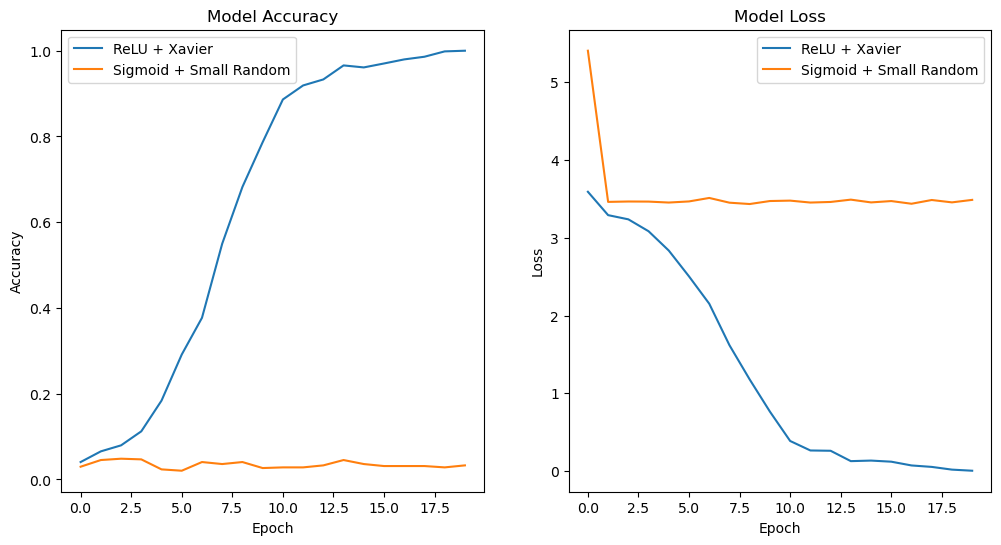

In [27]:
# Plotting the accuracy of both models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='ReLU + Xavier')
plt.plot(history2.history['accuracy'], label='Sigmoid + Small Random')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting the loss of both models
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='ReLU + Xavier')
plt.plot(history2.history['loss'], label='Sigmoid + Small Random')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()